In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('Train.csv')
x1=df['feature_1'].values
x2=df['feature_2'].values
x3=df['feature_3'].values
x4=df['feature_4'].values
x5=df['feature_5'].values
x6=np.ones((x5.shape[0],)).T
x=np.vstack((x1,x2,x3,x4,x5,x6))
print(x.shape)
print(x)
y=df['target'].values
y.reshape((-1,))
print(y.shape)

(6, 1600)
[[ 0.29341624 -0.83608408  0.23642511 ...  1.04417694 -1.2691729
  -1.88400025]
 [-0.94559871 -0.18922804  0.13283602 ... -0.89920649 -0.00505216
  -0.84942743]
 [-0.42110515 -0.77640262 -0.14772298 ...  1.73039905  1.85766873
  -1.45227035]
 [ 0.40681602 -1.05383124  0.69985396 ... -1.87105676 -1.08036482
   0.48861308]
 [ 0.52566183  0.59799685 -0.18736416 ...  0.44251965  0.73633394
   1.4595758 ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
(1600,)


In [31]:
def hypothesis(x,theta):
    return np.dot(theta,x)

In [32]:
def error(x,y,theta):
    e=0
    for i in range(x.shape[1]):
        X=x[:,i]
        e+=(hypothesis(X,theta)-y[i])**2
    return e/(x.shape[1]*2)

In [39]:
def grad(x,y,theta):
    g=np.zeros(x.shape[0])
    for i in range(x.shape[1]):
        X=x[:,i]
        for j in range(6):
            g[j]+=(hypothesis(X,theta)-y[i])*x[j][i]
    for i in range(6):
        g[i]/=x.shape[1]
    return g

In [40]:
def grad_ascent(x,y,learning_rate=0.01):
    err=[]
    theta_list=[]
    theta=np.zeros((6,))
    for i in range(1000):
        e=error(x,y,theta)
        g=grad(x,y,theta)
        for j in range(6):
            theta[j]-=learning_rate*g[j]
        err.append(e)
        theta_list.append(theta)
    return err,theta_list,theta

In [41]:
e,t,final=grad_ascent(x,y)

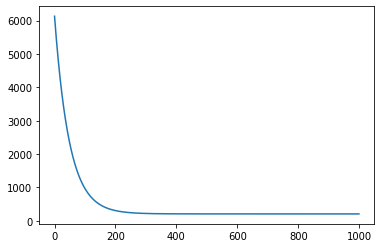

In [42]:
plt.plot(e)
plt.show()

In [43]:
print(final)

[29.67987527 92.65908015  8.27756078 44.76510038  2.51769725  4.98825521]
